<a href="https://colab.research.google.com/github/kauroah/Machine-Learning/blob/main/Drug_Consumption_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drug_consumption.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [ ]:
df.shape

(1885, 32)

In [ ]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [ ]:
df.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
age = {
          -0.95197: '18-24',
          -0.07854: '25 - 34',
          0.49788: '35 - 44',
          1.09449: '45 - 54',
          1.82213: '55 - 64',
          2.59171: '65+'
          }

gender = {
            0.48246: 'Female',
            -0.48246: 'Male'
            }

education = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree',
            }

country = {
            -0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'
            }

ethnicity = {
            -0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'
            }

usage = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
    }

In [ ]:
df['Age'] = df['Age'].replace(age)
df['Gender'] = df['Gender'].replace(gender)
df['Education'] = df['Education'].replace(education)
df['Country'] = df['Country'].replace(country)
df['Ethnicity'] = df['Ethnicity'].replace(ethnicity)
df['Alcohol'] = df['Alcohol'].replace(usage)
df['Amphet'] = df['Amphet'].replace(usage)
df['Amyl'] = df['Amyl'].replace(usage)
df['Benzos'] = df['Benzos'].replace(usage)
df['Caff'] = df['Caff'].replace(usage)
df['Cannabis'] = df['Cannabis'].replace(usage)
df['Choc'] = df['Choc'].replace(usage)
df['Coke'] = df['Coke'].replace(usage)
df['Crack'] = df['Crack'].replace(usage)
df['Ecstasy'] = df['Ecstasy'].replace(usage)
df['Heroin'] = df['Heroin'].replace(usage)
df['Ketamine'] = df['Ketamine'].replace(usage)
df['Legalh'] = df['Legalh'].replace(usage)
df['LSD'] = df['LSD'].replace(usage)
df['Meth'] = df['Meth'].replace(usage)
df['Mushrooms'] = df['Mushrooms'].replace(usage)
df['Nicotine'] = df['Nicotine'].replace(usage)
df['Semer'] = df['Semer'].replace(usage)
df['VSA'] = df['VSA'].replace(usage)

In [ ]:
df.head(3)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used


In [ ]:
num_cols = df.select_dtypes(include=['float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

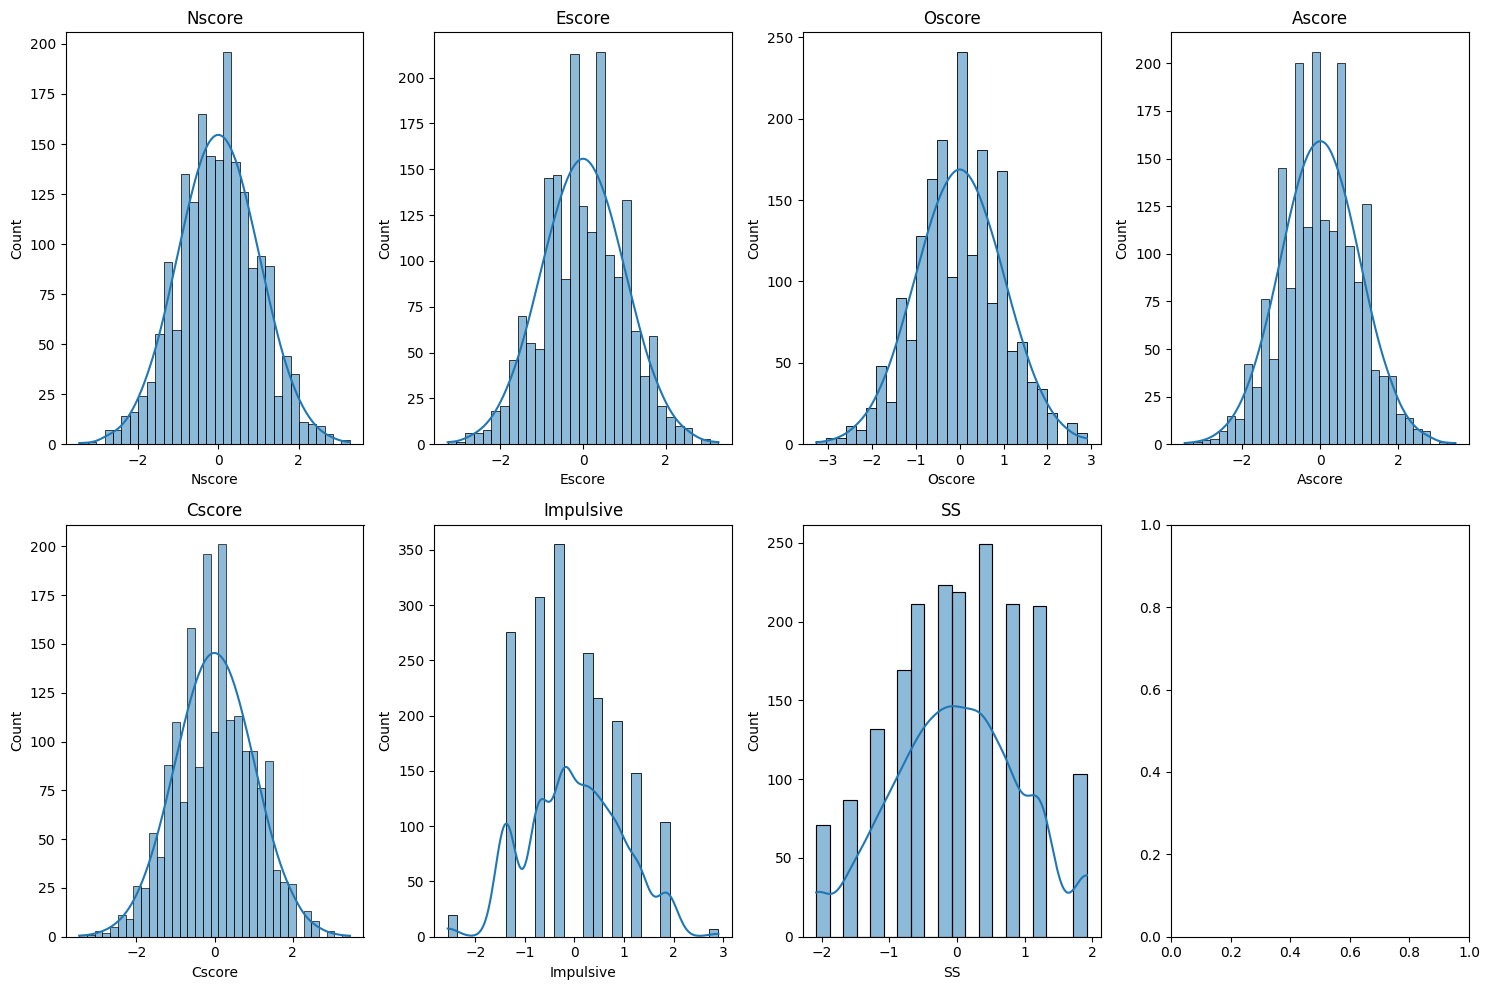

In [ ]:
f, ax = plt.subplots(2,4 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x = cols , ax= ax[index], kde=True)
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

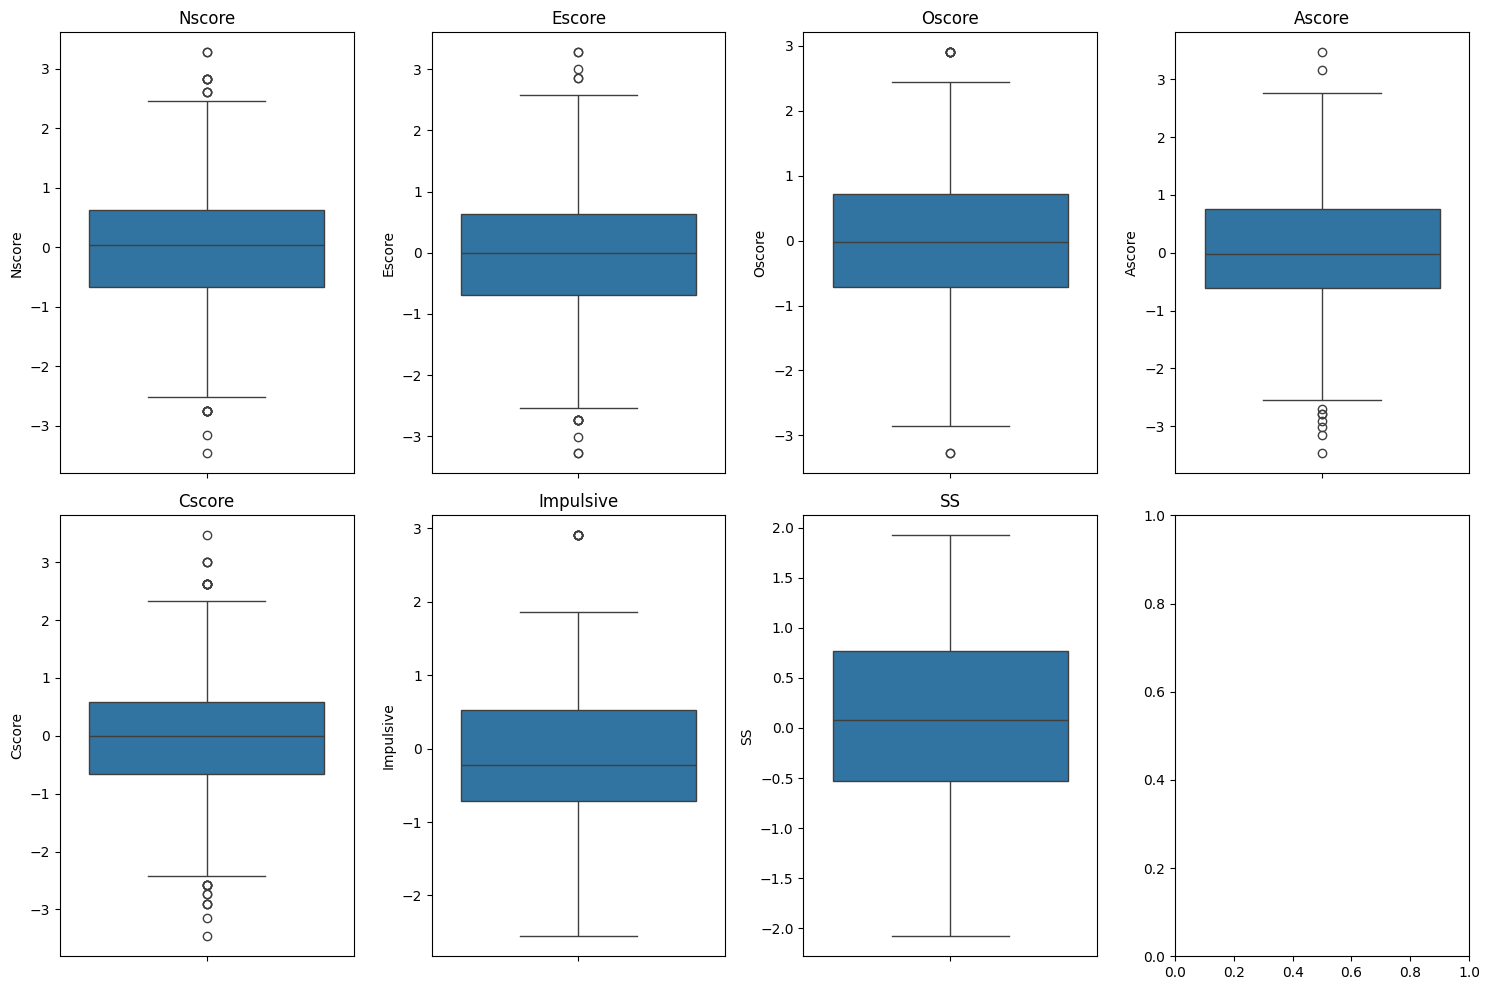

In [ ]:
f, ax= plt.subplots(2,4 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data = df, y = cols , ax = ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

In [ ]:
age_alcohol = df.groupby(['Age','Alcohol']).size().reset_index(name='count')

In [ ]:
age_alcohol

,Age,Alcohol,count
0,18-24,Never Used,14
1,18-24,Used in Last Day,149
2,18-24,Used in Last Decade,13
3,18-24,Used in Last Month,121
4,18-24,Used in Last Week,271
5,18-24,Used in Last Year,75
6,25 - 34,Never Used,9
7,25 - 34,Used in Last Day,123
8,25 - 34,Used in Last Decade,15
9,25 - 34,Used in Last Month,70


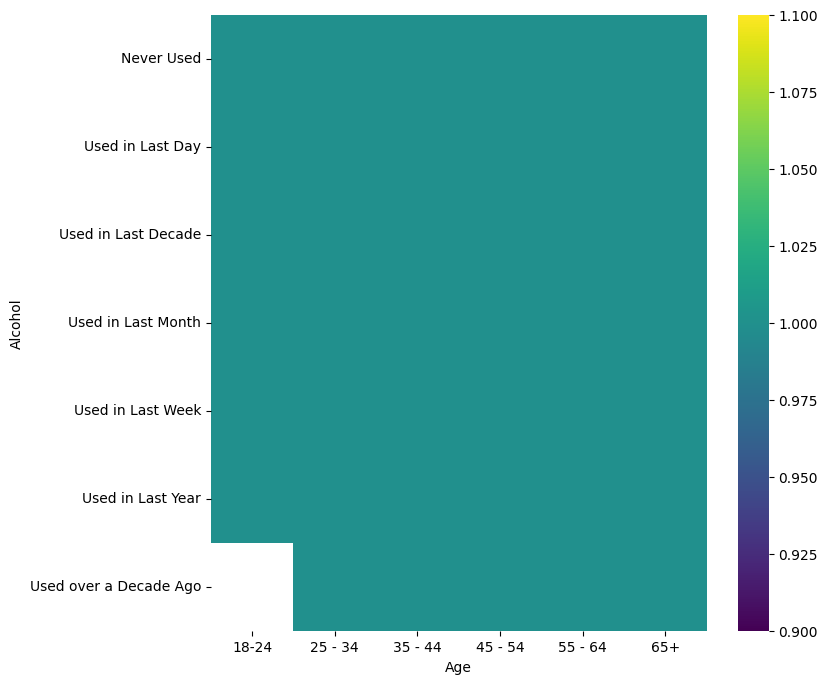

In [ ]:
# @title Age vs Alcohol

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Alcohol'].value_counts()
    for x_label, grp in age_alcohol.groupby('Age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age')
_ = plt.ylabel('Alcohol')

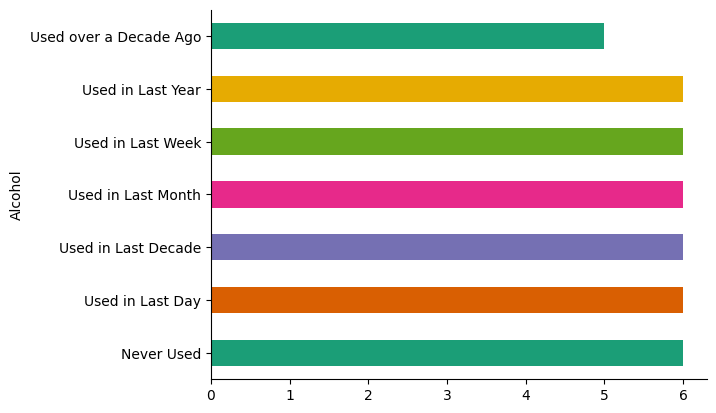

In [ ]:
# @title Alcohol

from matplotlib import pyplot as plt
import seaborn as sns
age_alcohol.groupby('Alcohol').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

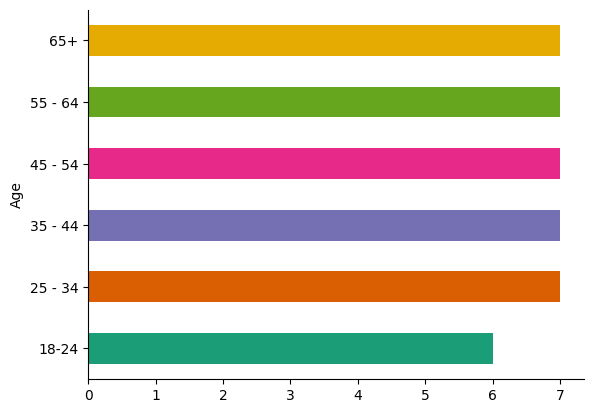

In [ ]:
# @title Age

from matplotlib import pyplot as plt
import seaborn as sns
age_alcohol.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

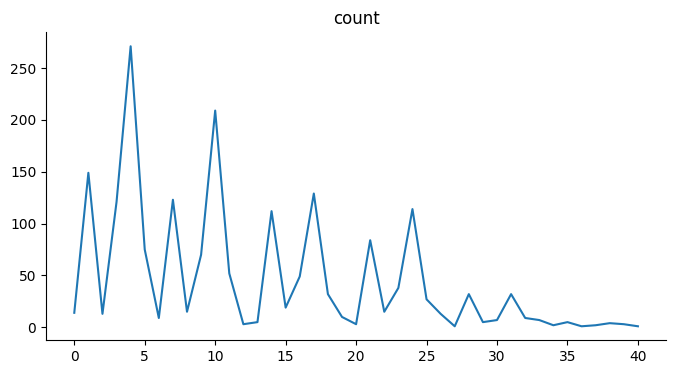

In [ ]:
# @title count

from matplotlib import pyplot as plt
age_alcohol['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

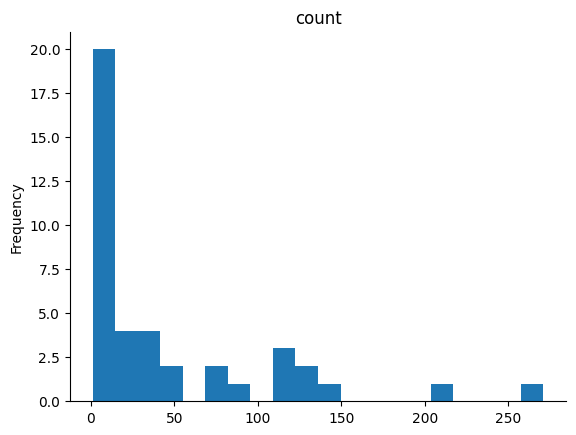

In [ ]:
# @title count

from matplotlib import pyplot as plt
age_alcohol['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
px.bar(age_alcohol, y= 'count', x = 'Age' , color = 'Alcohol', barmode = 'group', title = 'Alcohol use by age', text_auto = True)

In [ ]:
gender_alcohol = df.groupby(['Gender','Alcohol']).size().reset_index(name='count')

In [ ]:
gender_alcohol

,Gender,Alcohol,count
0,Female,Never Used,15
1,Female,Used in Last Day,230
2,Female,Used in Last Decade,32
3,Female,Used in Last Month,152
4,Female,Used in Last Week,403
5,Female,Used in Last Year,93
6,Female,Used over a Decade Ago,17
7,Male,Never Used,19
8,Male,Used in Last Day,275
9,Male,Used in Last Decade,36


In [ ]:
px.bar(gender_alcohol, y= 'count', x = 'Gender' , color = 'Alcohol', barmode = 'group', title = 'Alcohol use by Gender', text_auto = True)

In [ ]:
age_nicotine = df.groupby(['Age','Nicotine']).size().reset_index(name='count')

In [ ]:
age_nicotine

,Age,Nicotine,count
0,18-24,Never Used,107
1,18-24,Used in Last Day,243
2,18-24,Used in Last Decade,48
3,18-24,Used in Last Month,68
4,18-24,Used in Last Week,84
5,18-24,Used in Last Year,91
6,18-24,Used over a Decade Ago,2
7,25 - 34,Never Used,109
8,25 - 34,Used in Last Day,152
9,25 - 34,Used in Last Decade,68


In [ ]:
px.bar(age_nicotine , x='Age', y= 'count' , color = 'Nicotine', barmode = 'group', title = 'Nicotine use by Age', text_auto = True )

In [ ]:
gender_nicotine = df.groupby(['Gender','Nicotine']).size().reset_index(name='count')

In [ ]:
gender_nicotine


,Gender,Nicotine,count
0,Female,Never Used,275
1,Female,Used in Last Day,241
2,Female,Used in Last Decade,118
3,Female,Used in Last Month,46
4,Female,Used in Last Week,69
5,Female,Used in Last Year,87
6,Female,Used over a Decade Ago,106
7,Male,Never Used,153
8,Male,Used in Last Day,369
9,Male,Used in Last Decade,86


In [ ]:
px.bar(gender_nicotine, y= 'count', x = 'Gender' , color = 'Nicotine', barmode = 'group', title = 'Nicotine use by Gender', text_auto = True)

In [ ]:
UK = df[df['Country'] == 'UK']
UK_alcohol = UK.groupby(['Alcohol']).size().reset_index(name='count')
UK_alcohol

,Alcohol,count
0,Never Used,20
1,Used in Last Day,304
2,Used in Last Decade,33
3,Used in Last Month,124
4,Used in Last Week,461
5,Used in Last Year,80
6,Used over a Decade Ago,22


In [ ]:
fig = px.pie(UK_alcohol , values = 'count',names= 'Alcohol',title = 'UK alcohol use status')
fig.update_traces(textposition='outside',textinfo='label + percent + value')

In [ ]:
UK_Nicotine = UK.groupby(['Nicotine']).size().reset_index(name='count')
UK_Nicotine

,Nicotine,count
0,Never Used,320
1,Used in Last Day,262
2,Used in Last Decade,145
3,Used in Last Month,48
4,Used in Last Week,64
5,Used in Last Year,63
6,Used over a Decade Ago,142


In [ ]:
fig = px.pie(UK_Nicotine , values = 'count',names= 'Nicotine',title = 'UK Nicotine use status')
fig.update_traces(textposition='outside',textinfo='label + percent + value')

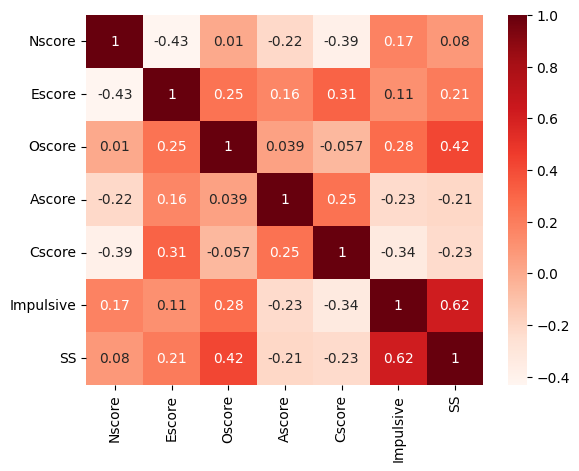

In [ ]:
  sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds')
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
import xgboost as xgb


from sklearn.metrics import accuracy_score , classification_report

In [ ]:
df = df.drop('ID', axis = 1)

In [ ]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
            'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Nicotine']

In [ ]:
X = df[features]
Y = df['Alcohol']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_RF = RF.predict(X_test)
print(classification_report(Y_test,pred_RF))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.25      0.22      0.23        92
           2       0.00      0.00      0.00        16
           3       0.33      0.04      0.08        68
           4       0.41      0.76      0.53       153
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00         7

    accuracy                           0.37       377
   macro avg       0.14      0.15      0.12       377
weighted avg       0.29      0.37      0.29       377



In [ ]:
print(f'accuracy : {accuracy_score(Y_test,pred_RF)}')

accuracy : 0.3687002652519894


In [ ]:
SVM = SVC(C=1 , kernel = 'rbf')

In [ ]:
SVM.fit(X_train,Y_train)

SVC(C=1)

In [ ]:
pred_SVM = SVM.predict(X_test)

In [ ]:
print(classification_report(Y_test,pred_SVM))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.14      0.01      0.02        92
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        68
           4       0.40      0.97      0.57       153
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00         7

    accuracy                           0.40       377
   macro avg       0.08      0.14      0.08       377
weighted avg       0.20      0.40      0.23       377



In [ ]:
print(f'accuracy : {accuracy_score(Y_test,pred_SVM)}')


accuracy : 0.3952254641909814


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load data
df = pd.read_csv('/content/drug_consumption.csv')

# Preprocess data (assuming your preprocessing steps here)
# Replace encoded values with readable values (you already did this)

# Handle missing values if any (example)
df = df.dropna()

# Split data into features and target
X = df.drop(['Alcohol'], axis=1)  # Drop the 'Alcohol' column from features
y = df['Alcohol']  # Assign the 'Alcohol' column to y as the target


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = num_cols  # List of numeric columns
categorical_features = cat_cols  # List of categorical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = RandomForestClassifier(random_state=42)

# Create a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))


ValueError: A given column is not a column of the dataframe

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load data
df = pd.read_csv('/content/drug_consumption.csv')

# Preprocess data (assuming your preprocessing steps here)
# Replace encoded values with readable values (you already did this)

# Handle missing values if any (example)
df = df.dropna()

# Assuming you have already replaced encoded values with readable values

# Define target column
target_column = 'Alcohol'  # Replace 'Alcohol' with the actual target column name

# Split data into features and target
X = df.drop([target_column], axis=1)  # Drop the target column from features
y = df[target_column]  # Assign the target column to y

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = RandomForestClassifier(random_state=42)

# Create a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))


Classification Report:
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         7
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        16
         CL3       0.33      0.09      0.14        34
         CL4       0.22      0.03      0.05        68
         CL5       0.43      0.81      0.56       153
         CL6       0.33      0.25      0.28        92

    accuracy                           0.40       377
   macro avg       0.19      0.17      0.15       377
weighted avg       0.32      0.40      0.32       377

Confusion Matrix:
[[  0   0   0   0   0   5   2]
 [  0   0   0   0   0   5   2]
 [  0   0   0   1   0  11   4]
 [  0   0   0   3   2  25   4]
 [  0   0   0   1   2  54  11]
 [  0   0   0   2   3 124  24]
 [  0   0   0   2   2  65  23]]
Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validati